In [2]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

dados = fetch_openml('mnist_784', as_frame=False)

X, Y= dados.data, dados.target

In [3]:
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:],Y[:60000],Y[60000:]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.astype("float64"))
X_test = scaler.transform(X_test.astype("float64"))

In [24]:
param_grid = {
    'n_estimators': [270, 280,290, 300, 310, 320, 330],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [25]:
grid = GridSearchCV(RandomForestClassifier(),param_grid=param_grid, cv=3,scoring='accuracy')
grid.fit(X_train, Y_train)
best = grid.best_params_

{'n_estimators': 300}

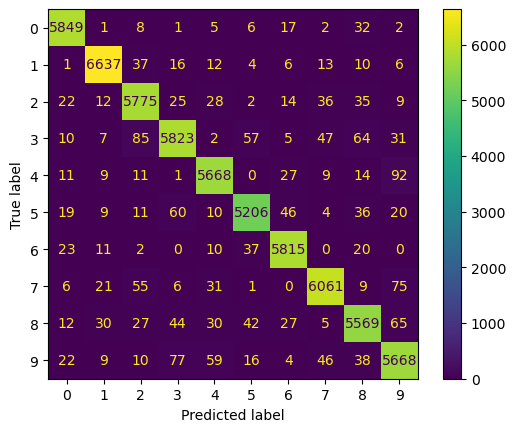

In [26]:
Y_train_pred = cross_val_predict(RandomForestClassifier(**best), X_train, Y_train,cv= 4)
ConfusionMatrixDisplay.from_predictions(Y_train, Y_train_pred)
plt.show()

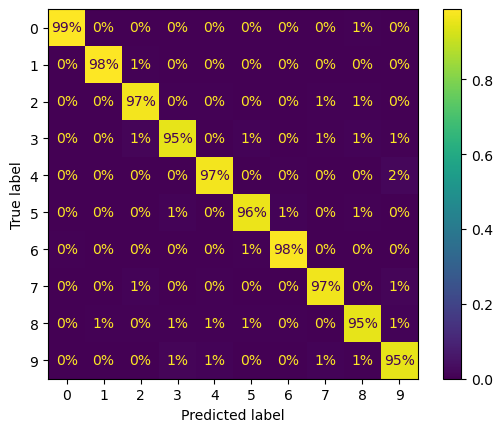

In [30]:
ConfusionMatrixDisplay.from_predictions(Y_train, Y_train_pred, normalize='true', values_format='.0%')
plt.show()

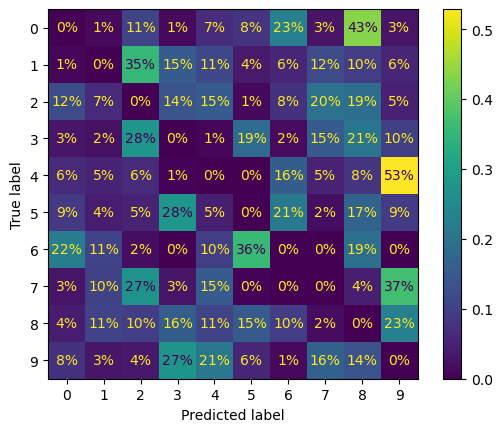

In [34]:
Errors = (Y_train_pred != Y_train)
ConfusionMatrixDisplay.from_predictions(Y_train, Y_train_pred, sample_weight=Errors, normalize = 'true', values_format='.0%')
plt.show()

In [4]:
a =  "4"
b =  "9"
X_aa = X_train[(Y_train == a) & (Y_train_pred == a)]
X_ab = X_train[(Y_train == a) & (Y_train_pred == b)]
X_ba = X_train[(Y_train == b) & (Y_train_pred == a)]
X_bb = X_train[(Y_train == b) & (Y_train_pred == b)]

NameError: name 'Y_train_pred' is not defined

In [ ]:
image_shape = (28, 28)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(X_aa[0].reshape(image_shape), cmap='gray')
axes[0, 0].set_title(f'Class {a} predicted as {a}')
axes[0, 0].axis('off')

axes[0, 1].imshow(X_ab[0].reshape(image_shape), cmap='gray')
axes[0, 1].set_title(f'Class {a} predicted as {b}')
axes[0, 1].axis('off')

axes[1, 0].imshow(X_ba[0].reshape(image_shape), cmap='gray')
axes[1, 0].set_title(f'Class {b} predicted as {a}')
axes[1, 0].axis('off')

axes[1, 1].imshow(X_bb[0].reshape(image_shape), cmap='gray')
axes[1, 1].set_title(f'Class {b} predicted as {b}')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()